**PROBLEM STATMENT**

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


**DataSet**

Item_Identifier : Unique product ID

Item_Weight : Weight of product

Item_Fat_Content : Whether the product is low fat or not

Item_Visibility : The % of total display area of all products in a store allocated to the particular product

Item_Type : The category to which the product belongs

Item_MRP : Maximum Retail Price (list price) of the product

Outlet_Identifier : Unique store ID

Outlet_Establishment_Year : The year in which store was established

Outlet_Size : The size of the store in terms of ground area covered

Outlet_Location_Type : The type of city in which the store is located

Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales : Sales of the product in the particular store.

**Importing Libraries**

In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA,TruncatedSVD
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

**Importing Dataset**

In [160]:
df_train = pd.read_csv("Train.csv")
df_test = pd.read_csv("Test.csv")

**Data Inspection**

In [161]:
df_train

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [162]:
df_test

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58       10.500          Regular         0.013496   
5677           FDD47        7.600          Regular         0.142991   
5678           NCO17       10.000          Low Fat         0.073529   
5679           FDJ26       15.300          Regular         0.000000   
5680           FDU37        9.500          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1                  Dairy   87.3198            OUT017   
2                 Others  241.7538            OUT010   
3            Snack Foods  155.0340            OUT017   
4                  Dairy  234.2300            OUT027   
...                  ...       ...               ...   
5676         Snack Foods  141.3154            OUT046   
5677       Starchy Foods  169.1448            OUT018   
5678  Health and Hygiene  118.7440            OUT045   
5679              Canned  214.6218            OUT017   
5680              Canned   79.7960            OUT045   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2007         NaN               Tier 2   
2                          1998         NaN               Tier 3   
3                          2007         NaN               Tier 2   
4                          1985      Medium               Tier 3   
...                         ...         ...                  ...   
5676                       1997       Small               Tier 1   
5677                       2009      Medium               Tier 3   
5678                       2002         NaN               Tier 2   
5679                       2007         NaN               Tier 2   
5680                       2002         NaN               Tier 2   

            Outlet_Type  
0     Supermarket Type1  
1     Supermarket Type1  
2         Grocery Store  
3     Supermarket Type1  
4     Supermarket Type3  
...                 ...  
5676  Supermarket Type1  
5677  Supermarket Type2  
5678  Supermarket Type1  
5679  Supermarket Type1  
5680  Supermarket Type1  

[5681 rows x 11 columns]

In [163]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [164]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [165]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [166]:
df_test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [167]:
df_train.info

<bound method DataFrame.info of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049 

In [168]:
df_train.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [169]:
df_test.info

<bound method DataFrame.info of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58       10.500          Regular         0.013496   
5677           FDD47        7.600          Regular         0.142991   
5678           NCO17       10.000          Low Fat         0.073529   
5679           FDJ26       15.300          Regular         0.000000   
5680           FDU37        9.500          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1  

In [170]:
df_test.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  4705.000000      5681.000000  5681.000000                5681.000000
mean     12.695633         0.065684   141.023273                1997.828903
std       4.664849         0.051252    61.809091                   8.372256
min       4.555000         0.000000    31.990000                1985.000000
25%       8.645000         0.027047    94.412000                1987.000000
50%      12.500000         0.054154   141.415400                1999.000000
75%      16.700000         0.093463   186.026600                2004.000000
max      21.350000         0.323637   266.588400                2009.000000

**Data Cleaning**

In [171]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [172]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

In [173]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [174]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [175]:
df_train['Outlet_Size'].mode()

0    Medium
dtype: object

In [176]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

In [177]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [178]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

**Data Preprocessing**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


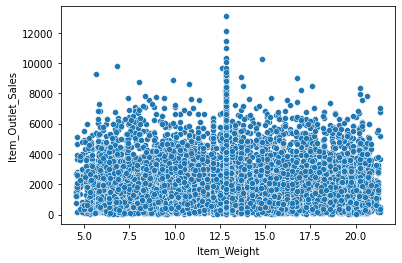

In [179]:
sns.scatterplot(df_train["Item_Weight"],df_train["Item_Outlet_Sales"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


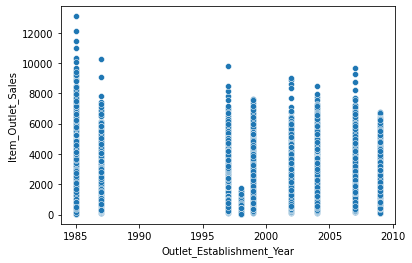

In [180]:
sns.scatterplot(df_train["Outlet_Establishment_Year"],df_train["Item_Outlet_Sales"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


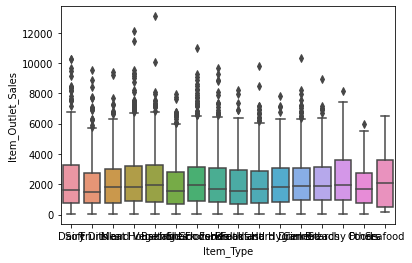

In [181]:
sns.boxplot(df_train["Item_Type"],df_train["Item_Outlet_Sales"])


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 90.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 65.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 83.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


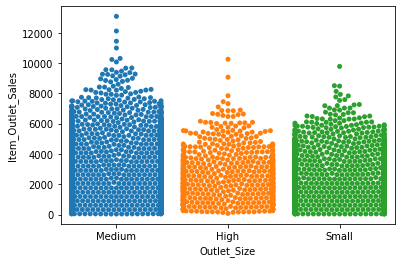

In [182]:
sns.swarmplot(df_train["Outlet_Size"],df_train["Item_Outlet_Sales"])

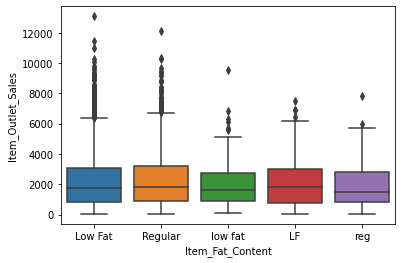

In [183]:
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df_train)
plt.show()

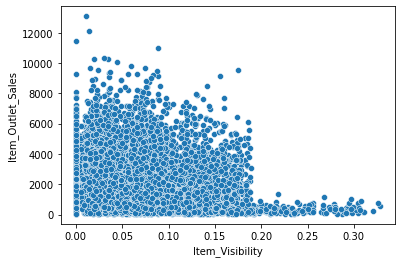

In [184]:
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=df_train)
plt.show()

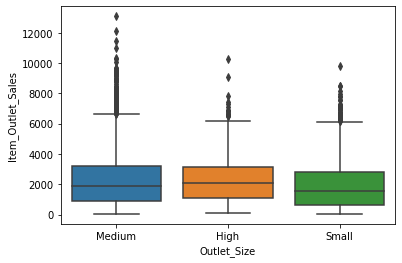

In [185]:
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df_train)
plt.show()


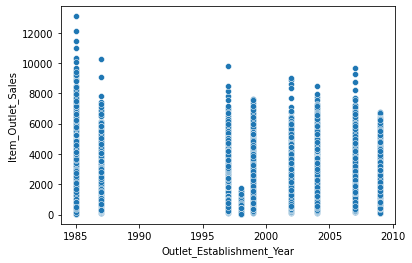

In [186]:
sns.scatterplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=df_train)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


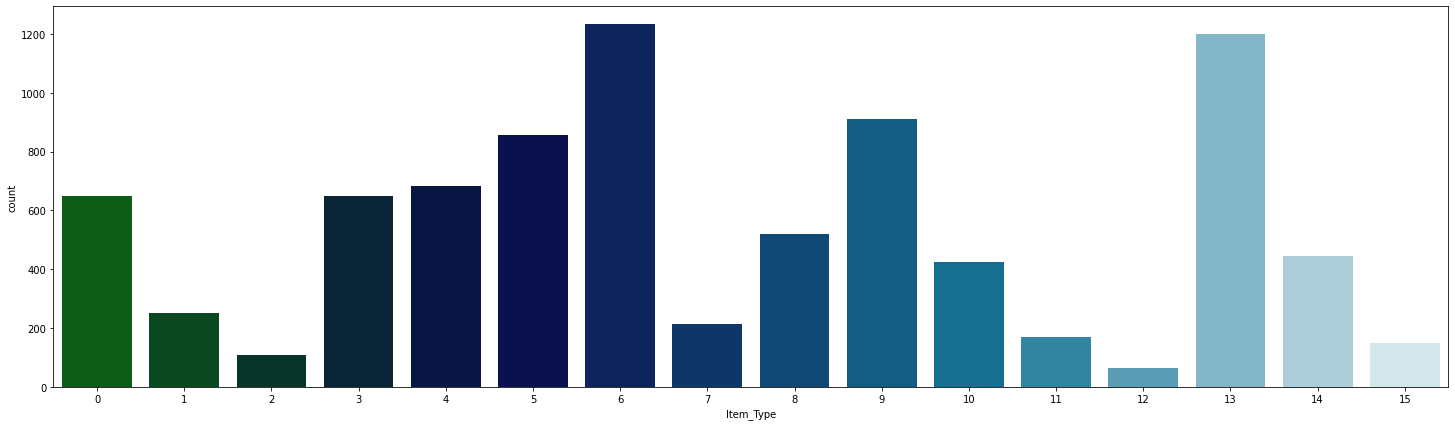

In [469]:
plt.figure(figsize=(25,7))
sns.countplot('Item_Type',data=df_train,palette='ocean')

Text(0, 0.5, 'Item Outlet Sales')

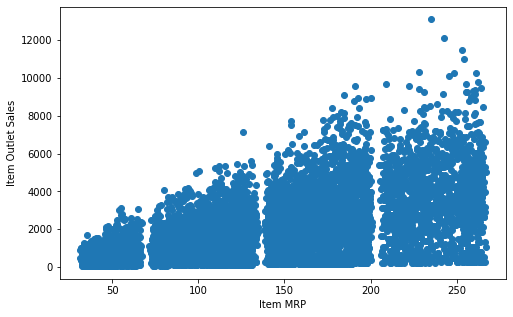

In [470]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_MRP',data=df_train)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')

In [187]:
df_train.corr()

Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.012049  0.024756   
Item_Visibility              -0.012049         1.000000 -0.001315   
Item_MRP                      0.024756        -0.001315  1.000000   
Outlet_Establishment_Year    -0.008301        -0.074834  0.005020   
Item_Outlet_Sales             0.011550        -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.008301           0.011550  
Item_Visibility                            -0.074834          -0.128625  
Item_MRP                                    0.005020           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000

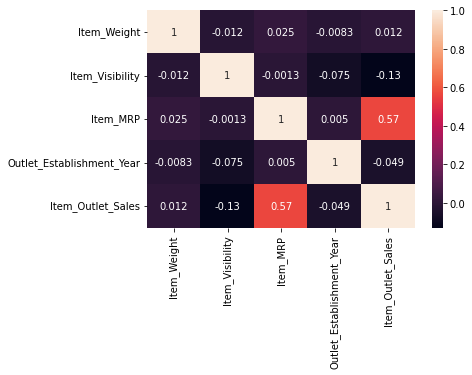

In [188]:
sns.heatmap(df_train.corr(),annot=True)

In [189]:
df_train.drop(columns=['Item_Identifier','Outlet_Identifier'],inplace=True)
df_test.drop(columns=['Item_Identifier','Outlet_Identifier'],inplace=True)

In [190]:
df_train

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0           9.300          Low Fat         0.016047                  Dairy   
1           5.920          Regular         0.019278            Soft Drinks   
2          17.500          Low Fat         0.016760                   Meat   
3          19.200          Regular         0.000000  Fruits and Vegetables   
4           8.930          Low Fat         0.000000              Household   
...           ...              ...              ...                    ...   
8518        6.865          Low Fat         0.056783            Snack Foods   
8519        8.380          Regular         0.046982           Baking Goods   
8520       10.600          Low Fat         0.035186     Health and Hygiene   
8521        7.210          Regular         0.145221            Snack Foods   
8522       14.800          Low Fat         0.044878            Soft Drinks   

      Item_MRP  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0     249.8092                       1999      Medium               Tier 1   
1      48.2692                       2009      Medium               Tier 3   
2     141.6180                       1999      Medium               Tier 1   
3     182.0950                       1998      Medium               Tier 3   
4      53.8614                       1987        High               Tier 3   
...        ...                        ...         ...                  ...   
8518  214.5218                       1987        High               Tier 3   
8519  108.1570                       2002      Medium               Tier 2   
8520   85.1224                       2004       Small               Tier 2   
8521  103.1332                       2009      Medium               Tier 3   
8522   75.4670                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 10 columns]

In [455]:
df_test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [456]:
df_test

Item_Weight Item_Fat_Content  Item_Visibility           Item_Type  \
0       20.750000          Low Fat         0.007565         Snack Foods   
1        8.300000          Regular         0.038428               Dairy   
2       14.600000          Low Fat         0.099575              Others   
3        7.315000          Low Fat         0.015388         Snack Foods   
4       12.695633          Regular         0.118599               Dairy   
...           ...              ...              ...                 ...   
5676    10.500000          Regular         0.013496         Snack Foods   
5677     7.600000          Regular         0.142991       Starchy Foods   
5678    10.000000          Low Fat         0.073529  Health and Hygiene   
5679    15.300000          Regular         0.000000              Canned   
5680     9.500000          Regular         0.104720              Canned   

      Item_MRP  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0     107.8622                       1999      Medium               Tier 1   
1      87.3198                       2007      Medium               Tier 2   
2     241.7538                       1998      Medium               Tier 3   
3     155.0340                       2007      Medium               Tier 2   
4     234.2300                       1985      Medium               Tier 3   
...        ...                        ...         ...                  ...   
5676  141.3154                       1997       Small               Tier 1   
5677  169.1448                       2009      Medium               Tier 3   
5678  118.7440                       2002      Medium               Tier 2   
5679  214.6218                       2007      Medium               Tier 2   
5680   79.7960                       2002      Medium               Tier 2   

            Outlet_Type  
0     Supermarket Type1  
1     Supermarket Type1  
2         Grocery Store  
3     Supermarket Type1  
4     Supermarket Type3  
...                 ...  
5676  Supermarket Type1  
5677  Supermarket Type2  
5678  Supermarket Type1  
5679  Supermarket Type1  
5680  Supermarket Type1  

[5681 rows x 9 columns]

**Feature Engineering**

In [457]:
le = LabelEncoder()

In [458]:
df_train["Item_Fat_Content"]=le.fit_transform(df_train["Item_Fat_Content"])
df_train["Item_Type"]=le.fit_transform(df_train["Item_Type"])
df_train["Outlet_Location_Type"]=le.fit_transform(df_train["Outlet_Location_Type"])
df_train["Outlet_Type"]=le.fit_transform(df_train["Outlet_Type"])
df_train["Outlet_Size"]=le.fit_transform(df_train["Outlet_Size"])

In [459]:
df_train

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0           9.300                 1         0.016047          4  249.8092   
1           5.920                 2         0.019278         14   48.2692   
2          17.500                 1         0.016760         10  141.6180   
3          19.200                 2         0.000000          6  182.0950   
4           8.930                 1         0.000000          9   53.8614   
...           ...               ...              ...        ...       ...   
8518        6.865                 1         0.056783         13  214.5218   
8519        8.380                 2         0.046982          0  108.1570   
8520       10.600                 1         0.035186          8   85.1224   
8521        7.210                 2         0.145221         13  103.1332   
8522       14.800                 1         0.044878         14   75.4670   

      Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
0                          1999            1                     0   
1                          2009            1                     2   
2                          1999            1                     0   
3                          1998            1                     2   
4                          1987            0                     2   
...                         ...          ...                   ...   
8518                       1987            0                     2   
8519                       2002            1                     1   
8520                       2004            2                     1   
8521                       2009            1                     2   
8522                       1997            2                     0   

      Outlet_Type  Item_Outlet_Sales  
0               1          3735.1380  
1               2           443.4228  
2               1          2097.2700  
3               0           732.3800  
4               1           994.7052  
...           ...                ...  
8518            1          2778.3834  
8519            1           549.2850  
8520            1          1193.1136  
8521            2          1845.5976  
8522            1           765.6700  

[8523 rows x 10 columns]

In [460]:
df_train.dtypes

Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

**Modeling**


In [461]:
x=df_train.drop('Item_Outlet_Sales',axis=1)
y=df_train['Item_Outlet_Sales']

In [462]:
pca = PCA(n_components=9,whiten=True)
a = pca.fit(x).transform(x)

In [463]:
x_train,x_test,y_train,y_test=train_test_split(a,y,test_size=0.20,random_state=123)

In [464]:
sc= StandardScaler()

In [465]:
x_train_std= sc.fit_transform(x_train)

In [466]:
x_test_std= sc.transform(x_test)

In [467]:
x_train_std

array([[-0.86861801,  1.52495397,  0.91785878, ...,  1.10893811,
        -1.01875126,  2.48796846],
       [-1.72626202, -0.14745374,  0.30716338, ..., -0.47701182,
         1.90481011,  0.03171063],
       [-0.28953092,  1.29779195, -0.83644241, ...,  0.62539875,
         0.62501452, -1.29994133],
       ...,
       [-1.45397549,  1.28467009, -0.13246734, ...,  0.89173875,
         0.60816058, -1.0488663 ],
       [-0.46766036, -1.32834393, -0.59654683, ..., -0.71049947,
        -0.27898048, -1.08477618],
       [-1.3032787 , -1.33643908, -0.05683351, ...,  4.09634528,
        -0.42580196,  0.23699803]])

In [468]:
x_test_std

array([[-1.60307791, -0.74539147,  1.4878087 , ...,  1.21652627,
        -1.52910581, -1.31837653],
       [ 0.39681761,  1.53406928, -0.21013036, ...,  0.90821307,
        -0.99571967, -0.00740948],
       [ 0.79307057, -0.13390317,  1.90101297, ..., -0.30158106,
         1.91629135, -0.2542486 ],
       ...,
       [ 0.59610343, -0.01592198, -0.1878084 , ..., -0.93566042,
        -1.66614868, -1.24530905],
       [ 1.78517301,  0.10747774,  1.32196403, ...,  1.31224301,
        -0.1569913 , -0.74190694],
       [-0.84451355,  1.5380177 , -1.08324742, ...,  1.03310438,
        -0.26563406,  0.06712872]])

**Linear Regression**

In [394]:
lr = LinearRegression()

In [395]:
lr.fit(x_train_std,y_train)

LinearRegression()

In [396]:
y_pred_lr=lr.predict(x_test_std)

In [398]:
print(r2_score(y_test,y_pred_lr))
print(mean_absolute_error(y_test,y_pred_lr))
print(np.sqrt(mean_squared_error(y_test,y_pred_lr)))


0.5194720970112436
881.9321570402566
1172.8895308940243


**RandonmTree Forsest**

In [322]:
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(x_train_std,y_train)

RandomForestRegressor(n_estimators=1000)

In [323]:
y_pred_rf=rf.predict(x_test_std)

In [324]:
print(r2_score(y_test,y_pred_rf))
print(mean_absolute_error(y_test,y_pred_rf))
print(np.sqrt(mean_squared_error(y_test,y_pred_rf)))


0.5535012901937217
787.8788543483871
1130.5972074854187


In [299]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(x_train_std, x_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")


Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.943 using {'n_estimators': 1000}
0.929 (0.001) with: {'n_estimators': 10}
0.941 (0.001) with: {'n_estimators': 100}
0.943 (0.001) with: {'n_estimators': 1000}


In [300]:
grid_search_forest.best_params_

{'n_estimators': 1000}

In [301]:
grid_search_forest.best_score_

0.9425063688558558

In [302]:
Y_pred_rf_grid=grid_search_forest.predict(x_test_std)

In [303]:
Y_pred_rf_grid

array([[ 1.09780164, -1.32669045, -1.30856287, ...,  0.93008236,
        -0.30029279,  0.95369144],
       [ 0.74535896,  1.54187979, -0.93889267, ..., -0.4852133 ,
        -0.19758353,  0.52376935],
       [-0.65724538, -1.33986912, -0.2322416 , ..., -0.41673349,
        -0.27461751, -0.48312609],
       ...,
       [-0.99737834, -0.6755757 , -1.94292276, ..., -0.84310918,
         0.53446157, -0.71374898],
       [-1.06536852,  1.52009286,  0.97182076, ..., -0.44430078,
        -0.95293062, -0.56736276],
       [ 0.6405361 , -1.32324254, -0.12900401, ...,  0.93375356,
        -0.30399631, -0.43613088]])

**XG Regressor**

In [452]:
xgb_reg = xgb.XGBRegressor()

In [450]:
xgb_reg.fit(x_train, y_train)

[07:40:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [451]:
xgb_reg.score(x_test,y_test)

0.6213882625989766

CONCLUSION





*   Item_MRP clearly maximises the Outlet sales.
*   Outlet Type being SuperMarket or Grocery Store also depicts the Outlet Sales.
*   Years Established will also tend to have loyal customers and that's how the sales margin can be acheived.





